<a href="https://colab.research.google.com/github/ibmm-unibe-ch/word_embedding/blob/main/word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lost without coordinates: Unveiling word meaning

Imagine you are a traveler armed with just a list of city names. A bit overwhelming, isn't it? Without a map, deciphering their relative positions becomes a challenge. Enter coordinates—latitude and longitude. These numerical markers not only identify a city's exact location but also allow you to measure distances between them with ease.

In the realm of machine learning, understanding the subtleties of human language presents a similar puzzle. Words by themselves offer limited insight. For instance, merely encountering "king" or "queen" will not give a machine learning algorithm a clear understanding of their significance or relationship. This is where the power of word embeddings comes to the fore. Techniques like Word2Vec act as advanced language cartographers. For each word, it crafts high-dimensional vectors (imagine a space with more dimensions than our familiar three-dimensional world). These vectors (word embeddings) encapsulate the semantic meanings and associations between words. In this space, similar words cluster together; "king" and "queen" become close neighbors, while "king" and "banana" find themselves much farther apart.

But how does Word2Vec construct this intricate "language map"? Unlike traditional coordinates, this "language map" is crafted by learning vast amounts of text data. The learning process can be broken down into two key tasks:

### 1. Missing Word Prediction (Continuous Bag-of-Words (CBOW))
Imagine a sentence with a missing word, like "She played the _ on stage." During training, the Word2Vec model receives the surrounding words ("She played the" and "on stage") as context. By analyzing their embeddings, the model attempts to predict the missing word, such as "violin." This process helps the model understand how words function within a context and identify words that share similar semantic roles.

### 2. Identifying Related Words (Skip-gram with Negative Sampling)
This approach flips the perspective. Given a word like "violin," the model tries to predict surrounding words within a window (e.g., previous and following words) like "played" and "stage." Simultaneously, it distinguishes these actual surrounding words from negative samples (randomly chosen words that are unlikely to be neighbors). By minimizing the prediction error for real surrounding words and maximizing the difference for negative samples, the model learns to capture semantic relationships between words.

Through these iterative steps, Word2Vec refines its grasp of language. Exposed to vast amounts of text data, the model learns to predict missing words and identify related terms. This iterative learning progressively constructs a meaningful "coordinate system" for words, capturing the essence of language beyond mere literal definitions. As a result, machines equipped with Word2Vec can recognize not just individual words but also understand the intricate interplay and nuances of language.


## Practical exploration: Navigating the "Language Map" with word embeddings

This notebook offers a hands-on exploration of this concept using a pre-trained word2vec model.

### Tasks to Understand Word Embeddings

1. **Loading the Language Map:**  
   We'll start by loading a pre-trained word2vec model, granting access to pre-computed vector representations for an extensive vocabulary.

2. **Finding similar words:**  
   We'll delve into finding the closest neighbors (most similar words) for a given word based on its embedding vector.

3. **Word vector arithmetic:**  
   We'll conduct experiments with basic vector operations on word embeddings to uncover how these operations expose semantic relationships.

4. **Visualizing word relationships:**  
   Lastly, we'll employ Principal Component Analysis (PCA) to visualize word embeddings in a lower-dimensional space. This visualization will enable us to identify clusters of semantically related words.

Through these exercises, you'll gain practical insights into how word embeddings function and their potential applications in various NLP tasks. Let's dive in and navigate the fascinating world of word embeddings!


## Loading the Word2vec Model with gensim

In this section, we'll leverage the [`gensim`](https://github.com/piskvorky/gensim-data) library to load a pre-trained word2vec model. Gensim provides convenient functionalities for working with word embeddings, including loading pre-trained models.

**Choosing a Model: Balancing Speed and Performance**

We'll be using the `glove-wiki-gigaword-100` model in this example. This pre-trained model offers a good balance between model size and performance. It is lighter weight and faster to load compared to models with higher dimensions like `word2vec-google-news-300`.

**Note:** `word2vec-google-news-300`  delivers superior performance due to its larger vector size and richer training data, it also comes with a larger file size and longer loading times (several minutes). We recommend using this model, when running locally.


In [ ]:
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud

In [ ]:
model = api.load('glove-wiki-gigaword-100')
#If running locally consider using the following model
#model = api.load('word2vec-google-news-300') # Takes several minutes to load (not suitable for Binder)


[==================================================] 100.0% 128.1/128.1MB downloaded


### Retrieve Word Embedding with Word2Vec

This code snippet demonstrates how to retrieve the word embedding vector for the word 'fondue' using the Word2Vec model. The embedding vector's shape and the vector itself are printed to inspect its dimensions and values.


In [ ]:
# Define the word for which we want to retrieve the embedding
word = 'fondue'

# Retrieve the word embedding for the specified word using the word2vec model
word_embedding = model[word]

# Print the shape of the obtained word embedding
print(f"Shape of embedding: {word_embedding.shape}")

# Print the embedding vector for the specified word
print(f"Embedding for '{word}': \n {word_embedding}")



Shape of embedding: (100,)
Embedding for 'fondue': 
 [-7.8424e-01  6.9021e-01  1.1939e-01  6.6722e-01 -1.9269e-01  8.3620e-01
  3.1771e-01  2.7001e-01  6.9497e-01 -4.9579e-01 -2.1641e-01  6.0163e-01
 -1.0128e+00  6.3877e-01 -3.8587e-01  1.0658e+00  1.4873e-01 -5.4609e-01
 -3.8547e-01 -4.6037e-01 -2.0328e-01  3.0606e-01 -6.0987e-01 -1.3203e-01
  3.5229e-01 -1.4651e-01 -3.4323e-01 -3.6643e-01 -1.5585e-01 -1.1351e+00
  7.6145e-02 -5.0861e-03 -5.9121e-02 -2.5741e-01  2.6799e-01  4.4822e-01
  4.2010e-01 -5.1896e-01  1.9951e-01 -1.7861e+00  8.1634e-01 -2.6804e-01
 -2.1319e-01 -5.1474e-01  2.1462e-01 -3.6124e-01  2.0323e-01  7.6147e-02
 -8.9599e-02 -2.8411e-02 -3.7164e-01 -1.1479e-01 -2.9221e-01  2.7050e-01
 -6.7889e-01  4.1052e-01  1.6972e-01  3.4497e-01 -3.3922e-01  7.7281e-01
  4.8230e-01 -3.6776e-01 -1.8839e-01  5.0970e-01  5.3379e-01  2.3122e-01
  1.0070e-01 -3.5705e-01 -4.7337e-01 -3.3288e-01  1.7235e-01  2.3590e-01
 -9.8533e-02  9.0120e-01 -9.0386e-01  6.9933e-01  2.0722e-01 -5.5626e-0

We can visualize the embedding vector using a colored bar chart, where each dimension's value is represented by a color based on a selected colormap. This visualization offers a unique perspective on the distribution and magnitude of the embedding vector's components.

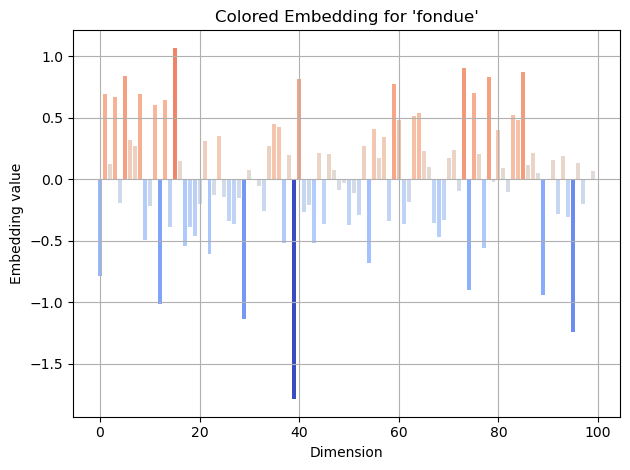

In [ ]:
# Create a colormap based on embedding size
colormap = matplotlib.colormaps['coolwarm']  # Choose a colormap (e.g., 'coolwarm', 'viridis')
m = np.max(np.abs(word_embedding))
norm = plt.Normalize(-m, m)  # Normalize values for colormap

# Create the bar chart with colors from the colormap
plt.figure()
bars = plt.bar(range(len(word_embedding)), word_embedding, color=colormap(norm(word_embedding)))

# Remove x-axis ticks and labels (optional)
# plt.xticks([])
plt.xlabel("Dimension")  # Keep label but hide ticks (optional)

# Set y-axis label
plt.ylabel("Embedding value")

# Title and grid
plt.title(f"Colored Embedding for '{word}'")
plt.grid(True)

# Add a colorbar to visualize the color-embedding value relationship
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Set an empty array to avoid plotting extra data points
#plt.colorbar(sm, label='Embedding Value')  # Add colorbar with label

plt.tight_layout()
plt.show()

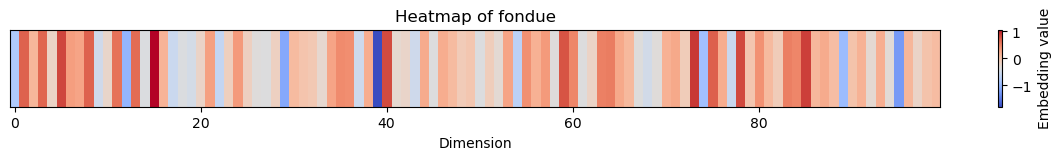

In [ ]:
vector_reshaped = word_embedding.reshape(1, -1)
# Create a heatmap
plt.figure(figsize=(15, 1))
plt.imshow(vector_reshaped, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Embedding value')
plt.title(f'Heatmap of {word}')
plt.xlabel('Dimension')
#plt.ylabel('Embedding')
#plt.xticks(np.arange(len(word_embedding)), labels=np.arange(len(word_embedding)))
plt.yticks([])
plt.show()

## Comparing Word Similarities with Word2Vec

Word2Vec not only provides word embeddings but also enables us to measure the semantic similarity between words based on their embedding vectors. In the following code snippet, we compare the similarity between the word 'fondue' and other selected words: 'cheese', 'alps', and 'cow'. For each word pair, we compute and print the similarity score, which quantifies how closely related the meanings of the two words are in the embedding space.


In [ ]:
for words_to_compare = [word, 'cheese', 'alps', 'cow']
for w in words_to_compare[1:]:
    print(f"Similarity between {word} and {w}: {model.similarity(word,w)}")


Similarity between fondue and cheese: 0.5131452083587646
Similarity between fondue and alps: 0.15986379981040955
Similarity between fondue and cow: 0.13167104125022888


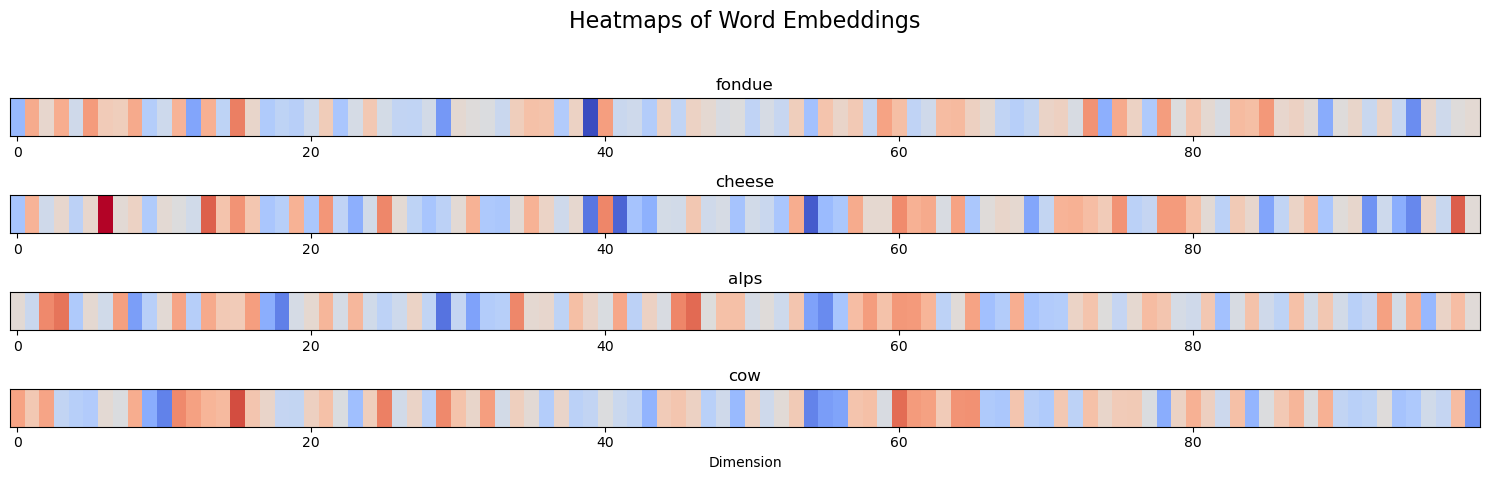

In [ ]:
# Get the embeddings for the words
embeddings = [model[sword] for sword in words_to_compare]
# Determine common color scale range
min_val = min(embeddings, key=lambda x: np.min(x)).min()
max_val = max(embeddings, key=lambda x: np.max(x)).max()

# Plotting
fig, axs = plt.subplots(len(words_to_compare), 1, figsize=(15, 5))

for i, (w, embedding) in enumerate(zip(words_to_compare, embeddings)):
    axs[i].imshow(embedding.reshape(1, -1), cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
    axs[i].set_title(w)

    #axs[i].set_ylabel('Value')
    #axs[i].set_xticks(np.arange(len(embedding)))
    axs[i].set_yticks([])
axs[i].set_xlabel('Dimension')
plt.suptitle('Heatmaps of Word Embeddings', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Finding Top Similar Words with Word2Vec

One of the powerful capabilities of Word2Vec is its ability to identify words that are most similar in meaning to a given word based on their embedding vectors. In this code snippet, we utilize this feature to find the top 5 words most similar to the word 'fondue'. We retrieve and display these similar words along with their similarity scores, providing insights into words that share semantic relationships with our target word.


In [ ]:
print(f"Top 5 similar words to {word}:")
for similar_word, similarity in model.most_similar(positive=[word], topn=5):
  print(f"- {similar_word} (Similarity: {similarity:.2f})")

Top 5 similar words to fondue:
- cheese_fondue (Similarity: 0.71)
- fondues (Similarity: 0.70)
- Fondue (Similarity: 0.68)
- raclette (Similarity: 0.67)
- chocolate_fondue (Similarity: 0.65)


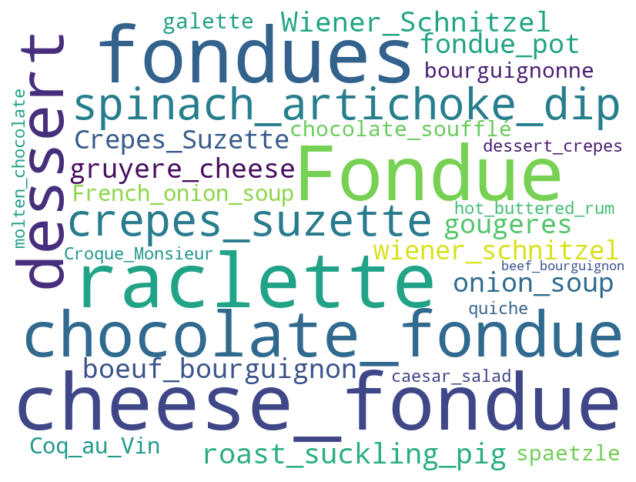

In [ ]:
# Create the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=600).generate_from_frequencies(dict(model.most_similar(positive=[word], topn=30)))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Analogies with Word2Vec: Exploring Semantic Relationships

Word2Vec not only captures individual word meanings but also allows us to explore semantic relationships between words through mathematical operations on their embeddings. In this code snippet, we delve into word analogies by performing arithmetic operations on word vectors. Specifically, we investigate the analogy: "{word1} is to {word2} as {word3} is to ?", aiming to find a word that completes the analogy. We then display the top 10 words that best fit this analogy, along with their similarity scores.

To further explore the capabilities and nuances of Word2Vec, we encourage you to test other analogies by modifying the example words and observing the resulting similarities.


In [ ]:
#word1 = 'sushi'
#word2 = 'Japan'
#word3 = 'Switzerland'
#word1 = 'tartiflette'
#word2 = 'France'
#word3 = 'Switzerland'
word1 = 'brownies'
word2 = 'USA'
word3 = 'Switzerland'

print(f"In math: {word1} - {word2} + {word3} = ?")
print(f"Top similar words:")
for similar_word, similarity in model.most_similar(positive=[word3,word1], negative=[word2], topn=10):
  print(f"- {similar_word} (Similarity: {similarity:.2f})")
print()

In math: brownies - USA + Switzerland = ?
Top similar words:
- fondue (Similarity: 0.51)
- cakes (Similarity: 0.51)
- oatmeal_raisin_cookies (Similarity: 0.50)
- chocolate_croissants (Similarity: 0.50)
- pastries (Similarity: 0.50)
- creme_caramel (Similarity: 0.50)
- blueberry_cheesecake (Similarity: 0.50)
- apple_strudel (Similarity: 0.49)
- ginger_cookies (Similarity: 0.49)
- muffins (Similarity: 0.49)



## Exploring Gender Analogies and Bias with Word2Vec

Word2Vec's ability to capture semantic relationships allows us to explore interesting analogies, including those related to gender. In this code snippet, we pose the question: "What is the female equivalent of a king?" Using word vector arithmetic, we compute the vector representation that captures the relationship between 'king', 'man', and 'woman'. We then identify and display the top 3 words that best complete this analogy, showcasing the model's understanding of gender-related semantic relationships.

As an exercise to further understand the potential biases in word embeddings, we encourage you to try replacing 'king' with 'doctor' and observe the resulting similarities. This comparison can shed light on how gender stereotypes might be reflected in the embeddings and highlight the importance of critically examining the outputs of language models.

In [ ]:
word1 = 'king'
word2 = 'man'
word3 = 'woman'
print(f"What is the female equivalent of a king? In math: {word1} - {word2} + {word3} = ?")
print(f"Top 3 similar words:")
for similar_word, similarity in model.most_similar(positive=[word3,word1], negative=[word2], topn=3):
  print(f"- {similar_word} (Similarity: {similarity:.2f})")
print()


What is the female equivalent of a king? In math: king - man + woman = ?
Top 3 similar words:
- queen (Similarity: 0.71)
- monarch (Similarity: 0.62)
- princess (Similarity: 0.59)



## Exploring Word Embeddings and Gender Bias with PCA

Word embeddings, such as those generated by Word2Vec, provide rich representations of words by capturing semantic relationships in language. In this code snippet, we visualize the embeddings of selected words using Principal Component Analysis (PCA). This visualization offers insights into how words are positioned in a high-dimensional space based on their meanings.

Beyond their utility, word embeddings have raised concerns about potential biases present in the data they are trained on, which can be reflected in the embeddings themselves. One area of interest is gender bias, where embeddings might inadvertently encode and reinforce stereotypes. By examining the spatial relationships between gender-specific words and other terms in the embedding space, we can gain a deeper understanding of the origins and manifestations of such biases in language models.

In this exploration, we visualize the embeddings of words related to gender roles and royalty, aiming to uncover any underlying biases and showcase how word embeddings can reflect societal stereotypes.


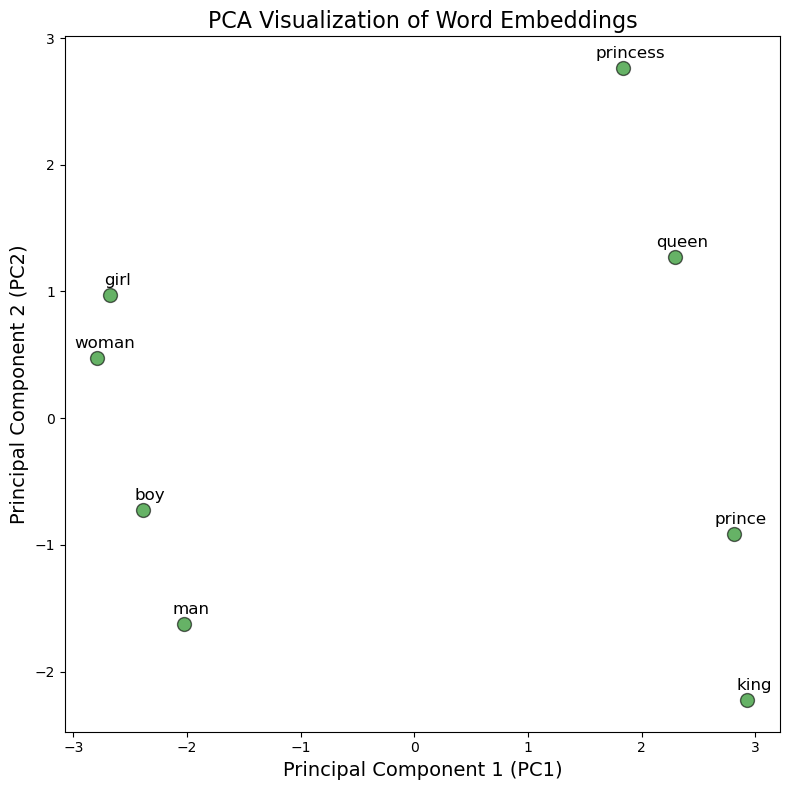

In [ ]:
# Words for visualization
words = ['man', 'woman', 'boy', 'girl', 'king', 'queen', 'prince', 'princess']

# Retrieve word vectors
sample_vectors = np.array([model[word] for word in words])

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(result[:, 0], result[:, 1], c='green', alpha=0.6, edgecolors='black', s=100)

for i, word in enumerate(words):
    plt.annotate(word, (result[i, 0], result[i, 1]), xytext=(5, 5), textcoords='offset points', fontsize=12, ha='center', va='bottom')

plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)
plt.title('PCA Visualization of Word Embeddings', fontsize=16)
#plt.grid(True)
plt.tight_layout()
plt.show()